### Práctica: Análisis de Sistemas en el Dominio del Tiempo vs. Dominio 's'.

**Objetivo:** Analizar un sistema LTI simple en ambos dominios para verificar que la respuesta es la misma. Se comparará el resultado obtenido a través del concepto de convolución en el tiempo con el método de la función de transferencia en el dominio de Laplace (dominio 's').

**Relaciones Fundamentales:**
* **Dominio del Tiempo:** La salida $y(t)$ es la convolución de la entrada $r(t)$ con la respuesta al impulso $h(t)$.
    $$ y(t) = r(t) * g(t) $$
* **Dominio 's' (Laplace):** La transformada de la salida $Y(s)$ es el producto de la transformada de la entrada $R(s)$ y la función de transferencia $G(s)$.
    $$ Y(s) = R(s) \cdot G(s) $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Configuración para que las gráficas se vean mejor en el notebook.
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# --- Dominio 's' (Laplace) ---
# La Función de Transferencia G(s) para un sistema con respuesta al impulso g(t) = 5 * exp(-2t) es:
# G(s) = 5 / (s + 2)

# En la biblioteca de control, definimos esto con sus coeficientes:
# El numerador es [5]
# El denominador es [1*s + 2], entonces sus coeficientes son [1, 2]
numerador = [5]
denominador = [1, 2]
G_s = ct.tf(numerador, denominador)

# Imprimimos la función de transferencia para verificar
print("La Función de Transferencia del sistema es:")
print(G_s)

La Función de Transferencia del sistema es:
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    5
  -----
  s + 2


In [4]:
# La forma más directa de comparar ambos mundos es simular la respuesta del sistema
# a una entrada escalón. La función `step_response` hace precisamente esto:
# Resuelve la ecuación en el tiempo, lo que es equivalente a la convolución,
# utilizando el modelo del sistema en el dominio 's' (la función de transferencia).

# Definimos el vector de tiempo para la simulación
t = np.linspace(0, 5, 500) # Simular de 0 a 5 segundos

# Calculamos la respuesta al escalón para el sistema G(s)
# La función devuelve el tiempo (t) y la salida c(t)
tiempo, c_dominio_tiempo = ct.step_response(G_s, T=t)

# --- Solución Analítica para Comparación ---
# Para verificar, podemos resolver la convolución de forma analítica.
# La convolución de r(t) = u(t) y g(t) = 5*exp(-2t) es:
# c(t) = 2.5 * (1 - exp(-2t))
# Calculamos esta solución para compararla con la simulación.
c_dominio_s = 2.5 * (1 - np.exp(-2 * tiempo))

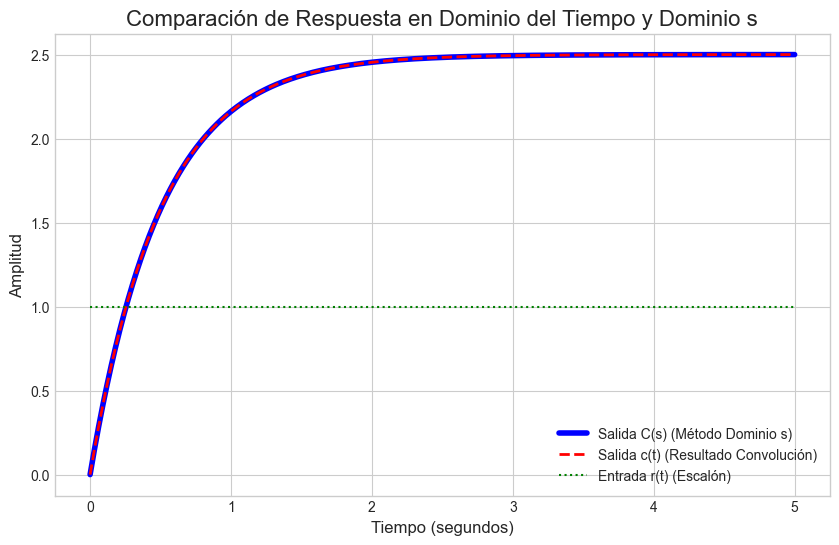

In [ ]:
plt.figure(figsize=(10, 6))

# Graficar la salida obtenida por la simulación de la biblioteca de control
plt.plot(tiempo, c_dominio_tiempo, label='Salida C(s) (Método Dominio s)', linewidth=4, color='blue')

# Graficar la salida calculada analíticamente (resultado de la convolución)
plt.plot(tiempo, c_dominio_s, label='Salida c(t) (Resultado Convolución)', linestyle='--', color='red', linewidth=2)

# Graficar la señal de entrada r(t) para tener una referencia
plt.plot(tiempo, np.ones_like(tiempo), label='Entrada r(t) (Escalón)', linestyle=':', color='green')

# Títulos y etiquetas
plt.title('Comparación de Respuesta en Dominio del Tiempo y Dominio s', fontsize=16)
plt.xlabel('Tiempo (segundos)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

Como se puede observar en la gráfica, la línea azul (Salida Simulada) y la línea roja punteada (Salida Analítica) **se superponen perfectamente**.

Esto demuestra que:

1.  El método de la **Función de Transferencia** en el dominio 's' es una herramienta precisa para analizar el comportamiento de un sistema.
2.  La simulación realizada por la biblioteca de control, que usa el modelo $H(s)$, produce el mismo resultado que resolver la **integral de convolución** en el dominio del tiempo.
3.  Se confirma que la Transformada de Laplace es un puente eficaz que simplifica el análisis de sistemas, convirtiendo la convolución en una simple multiplicación algebraica.


### Ejercicio 2: Analisis de un Circuito RL

**Objetivo:** Analizar un circuito RL de primer orden para verificar que la respuesta obtenida por simulacion (dominio 's') coincide con la solución analitica de su ecuación diferencial (dominio del tiempo).

**Relaciones Fundamentales:**
* **Dominio del Tiempo:** La dinamica del sistema se describe por su ecuacion diferencial, donde $r(t)$ es el voltaje de entrada y $c(t)$ es la corriente de salida.
    $$L \frac{dc(t)}{dt} + R c(t) = r(t)$$
* **Dominio 's' (Laplace):** La relacion entrada-salida se describe por la funcion de transferencia $G(s)$.
    $$G(s) = \frac{C(s)}{R(s)} = \frac{1}{Ls + R}$$

**Valores de los componentes:**
* Resistencia $R = 4 \, \Omega$
* Inductancia $L = 2 \, H$
* Entrada $r(t)$: Un escalon de **1 Volt** aplicado en $t=0$.


Funcion de Transferencia del circuito RL:
<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

   0.5
  -----
  s + 2


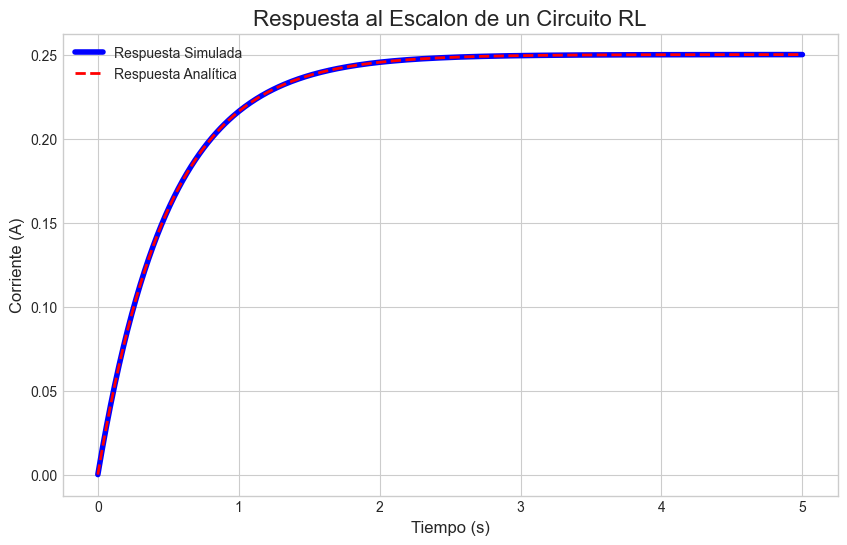

In [10]:
# Circuito RL

# En la biblioteca de control, definimos esto con sus coeficientes:
# El numerador es [0.5]
# El denominador es [1*s + 2], entonces sus coeficientes son [1, 2]
num = [0.5]
den = [1, 2]
Gs_rl = ct.tf(num, den)

# Imprimimos la función de transferencia para verificar
print("Funcion de Transferencia del circuito RL:")
print(Gs_rl)

# Definimos el vector de tiempo para la simulación
t_rl = np.linspace(0, 5, 500) # Simular de 0 a 5 segundos

# Calculamos la respuesta al escalón para el sistema G(s)
# La función devuelve el tiempo (t) y la salida c(t)
tiempo, c_simulada = ct.step_response(Gs_rl, T=t_rl)

# --- Solución Analítica para Comparación ---
# Para verificar, podemos resolver la ecuación diferencial del circuito RL para una entrada escalón.
# La solución analítica de la corriente c(t) para una entrada r(t) = 1 (escalón unitario) es:
# c(t) = 0.25 * (1 - exp(-2t))
# Calculamos esta solución para compararla con la simulación.
c_analitica = 0.25 * (1 - np.exp(-2 * tiempo))


plt.figure(figsize=(10, 6))

# Graficar la salida obtenida por la simulación de la biblioteca de control
plt.plot(tiempo, c_simulada, label='Respuesta Simulada', linewidth=4, color='blue')

# Graficar la salida calculada analíticamente (resultado de la convolución)
plt.plot(tiempo, c_analitica, label='Respuesta Analítica', linestyle='--', color='red', linewidth=2)

# Títulos y etiquetas
plt.title('Respuesta al Escalon de un Circuito RL', fontsize=16)
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Corriente (A)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Como se pudo observar en las dos gráficas, tanto para el sistema de ejemplo como para el circuito RL, la línea de la Salida Simulada y la línea de la Salida Analítica se superponen perfectamente.
Esto demuestra y confirma varios puntos fundamentales de la teoría de control:

1.  El método de la **Función de Transferencia** en el dominio 's' es una herramienta precisa para analizar el comportamiento de un sistema **LTI**.
2.  La simulación realizada por la biblioteca de control, que usa el modelo $G(s)$, produce un resultado idéntico a resolver la **integral de convolución** (o la ecuación diferencial) en el dominio del tiempo.
3.  Se confirma que la Transformada de Laplace es un puente eficaz que simplifica el análisis de sistemas, convirtiendo la convolución en una simple multiplicación algebraica.